<a href="https://colab.research.google.com/github/ashfaknawshad/ml-roadmap/blob/main/04_deep_learning/cnn_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
from keras.utils import to_categorical

### Step 2: Load and Preprocess Data

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape to add channel dimension (needed for Conv2D)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Step 3 - Build CNN Model

In [3]:
model = Sequential()

# 1st Convolutional layer + Pooling
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Convolutional layer + Pooling
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 4 - Compile Model

In [4]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Step 5 - Train CNN

In [5]:
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=5,  # start small for Colab
    batch_size=32,
    verbose=1
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 30ms/step - accuracy: 0.9073 - loss: 0.2976 - val_accuracy: 0.9827 - val_loss: 0.0542
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9849 - loss: 0.0466 - val_accuracy: 0.9870 - val_loss: 0.0449
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9906 - loss: 0.0300 - val_accuracy: 0.9855 - val_loss: 0.0498
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9934 - loss: 0.0209 - val_accuracy: 0.9890 - val_loss: 0.0381
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.9954 - loss: 0.0149 - val_accuracy: 0.9907 - val_loss: 0.0376


### Step 6 - Evaluate Model

In [6]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9875 - loss: 0.0389
Test Accuracy: 0.9894999861717224


### Optional steps:
### Step i - Make Predictions

In [7]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


### Step ii - Visualize a Few Predictions

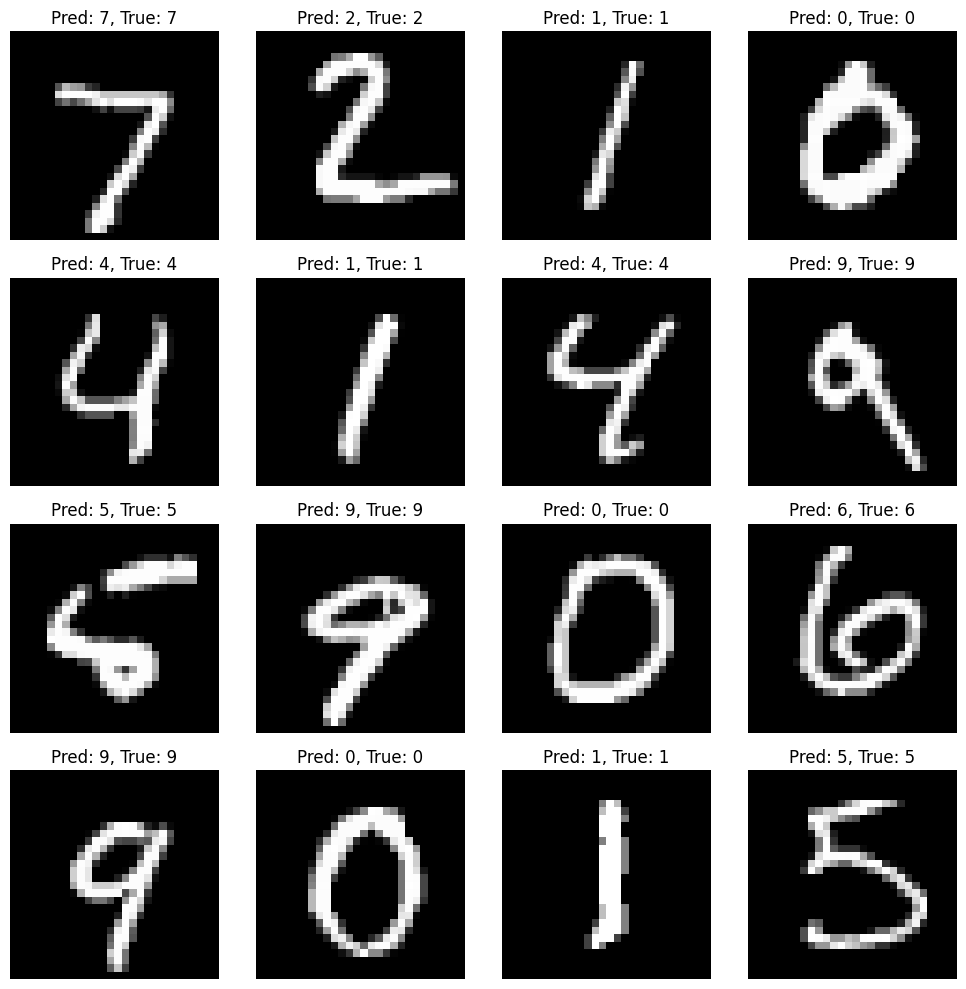

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_classes[i]}, True: {true_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### Step iii - Find Miscalculations (Optional)

Number of misclassified samples: 105


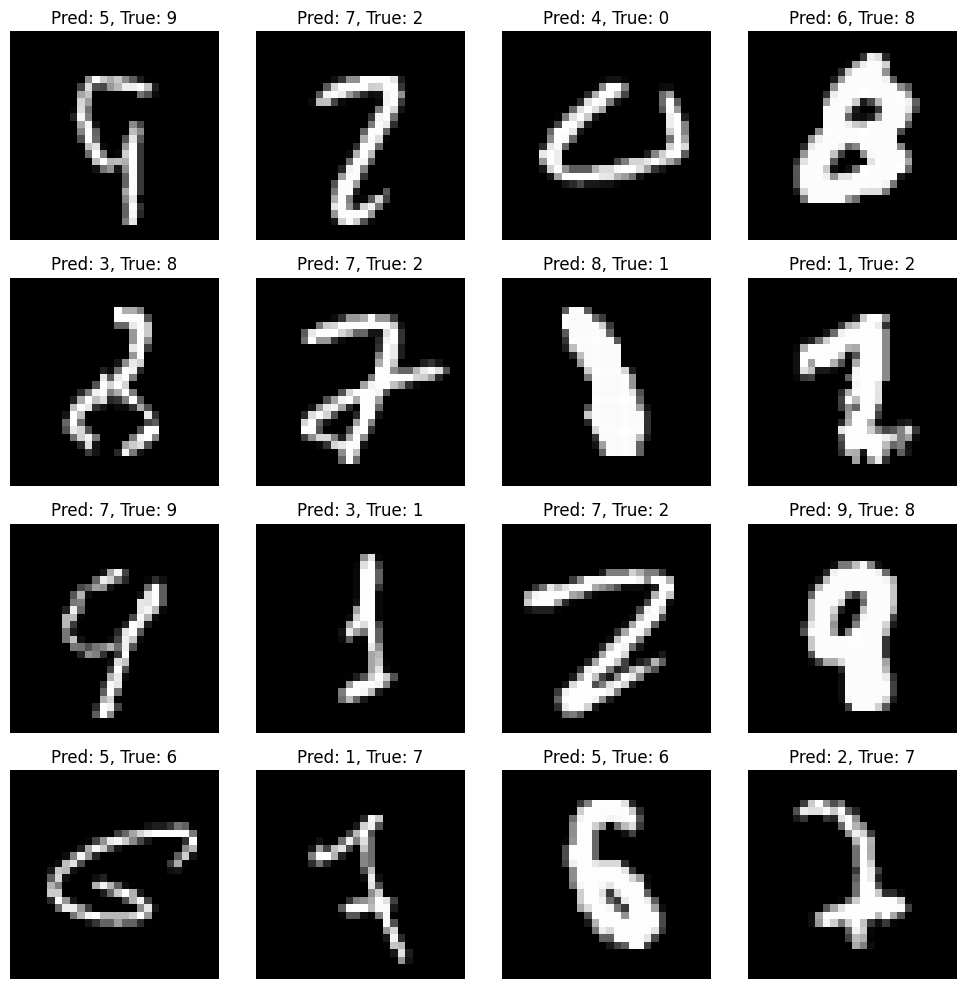

In [9]:
errors = np.where(predicted_classes != true_classes)[0]
print(f"Number of misclassified samples: {len(errors)}")

plt.figure(figsize=(10, 10))
for i, idx in enumerate(errors[:16]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_classes[idx]}, True: {true_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### Step iv - Visualize CNN Filters (Feature Maps)

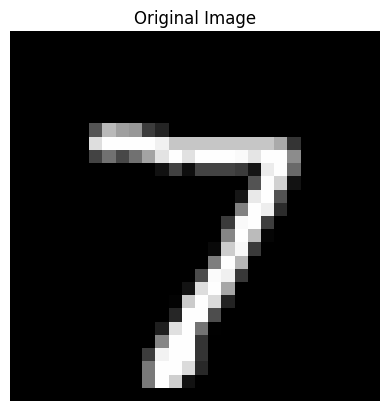

In [10]:
# This will show what each convolutional layer detects — edges, curves, and later, abstract patterns.
# Pick one image from the test set
sample_image = X_test[0]
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()


In [12]:
# Force model to initialize if it hasn't been called yet
_ = model.predict(X_train[:1])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [18]:
# Create a model that Outputs Feature Maps

from keras.models import Model
from keras.layers import Input

# Define the input tensor
input_tensor = Input(shape=(28, 28, 1))

# Recreate the original model using the input tensor
x = input_tensor
x = Conv2D(32, kernel_size=(3,3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(64, kernel_size=(3,3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_tensor = Dense(10, activation='softmax')(x)

# Create the original model
model = Model(inputs=input_tensor, outputs=output_tensor)

# Extract the outputs of each Conv2D and Pooling layer from the new model
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]

# Create a new model that gives these outputs
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Get activations for our sample image
activations = activation_model.predict(sample_image.reshape(1, 28, 28, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


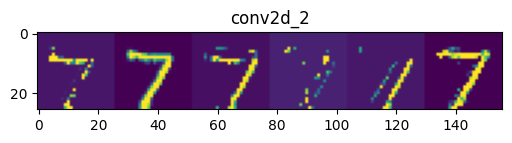

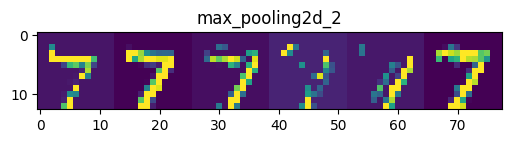

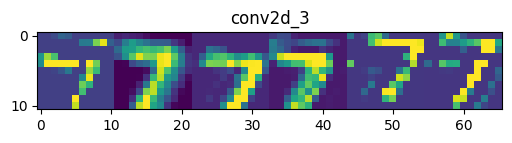

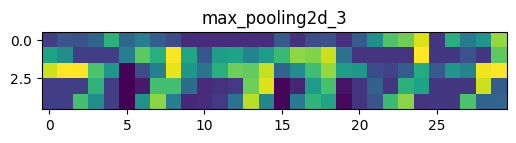

In [19]:
# Visualize the feature maps
layer_names = [layer.name for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]  # number of filters
    size = layer_activation.shape[1]         # feature map size

    # Display first 6 feature maps for each layer
    display_grid = np.zeros((size, size * 6))
    for i in range(6):
        activation_map = layer_activation[0, :, :, i]
        activation_map -= activation_map.mean()
        activation_map /= activation_map.std() + 1e-5
        activation_map *= 64
        activation_map += 128
        activation_map = np.clip(activation_map, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = activation_map

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
